In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [35]:
keras = tf.keras

# Load the data
companies_df = pd.read_csv('companies.csv', sep='delimiter', header=None)
print(companies_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


                         0
0            Hashplay Inc.
1           New Incentives
2                 GrabJobs
3                MediBookr
4       MelissaWithLove.co
...                    ...
172481          ZyroFisher
172482         Zytex group
172483         Zytoservice
172484              Zywave
172485       zZounds Music

[172486 rows x 1 columns]


In [37]:
# Create corpus
corpus = companies_df[0].str.cat(sep='\n')

corpus_length = len(corpus)

print(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Hashplay Inc.
New Incentives
GrabJobs
MediBookr
MelissaWithLove.co
Starting 11
The CarShare Guy
Allahabad Bank
Anlaiye
Any Time Loan
Asieris Pharmaceuticals
Birner Dental Management Services (PERFECT TEETH)
Blockchain Foundry
Breethe
Buffalo Wild Wings
Canadian Solar
Convert Group
DeepCam
Doctaly
Gaze Coin
HaploX Biotechnology
HIVE Blockchain
Hubrix
KingFocus Biomedical
Meipian
Nanyan Information
Plex-VR
Revio
TrendKite
TrySome
University of Wisconsin, Milwaukee
AIpark
ALINA
Apprentice
Aptus Value Housing Finance India
ARADA
Beta Bionics
Billy Inc.
Castle Information Systems
Chushou
Emera
Handful
Huaqin Communication Technology
Kolte-Patil Developers
LHN
MarketsFlow
New York Medical College
Pixo
Selly Automotive (A1 Software Group Inc)
Uber
Urbanbase Inc.
Alter Pharma
CLEW Medical
Ericsson
Flexenclosure
Foyr
GarageOnRoad
Globe Soccer
Hellobike
Indoleads.com
Internet Archive
Lendingkart
MEL Science
MissFresh
MJardin Group
nOCD
OfficeRock
RR.TV
Sirin Labs
SoYoung Technology
Suning Financ

In [38]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

Our corpus contains 150 unique characters.


In [39]:
print(encoding)
print(decoding)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, '&': 7, "'": 8, '(': 9, ')': 10, '*': 11, '+': 12, ',': 13, '-': 14, '.': 15, '/': 16, '0': 17, '1': 18, '2': 19, '3': 20, '4': 21, '5': 22, '6': 23, '7': 24, '8': 25, '9': 26, ':': 27, '=': 28, '>': 29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35, 'E': 36, 'F': 37, 'G': 38, 'H': 39, 'I': 40, 'J': 41, 'K': 42, 'L': 43, 'M': 44, 'N': 45, 'O': 46, 'P': 47, 'Q': 48, 'R': 49, 'S': 50, 'T': 51, 'U': 52, 'V': 53, 'W': 54, 'X': 55, 'Y': 56, 'Z': 57, '[': 58, '\\': 59, ']': 60, '^': 61, '_': 62, 'a': 63, 'b': 64, 'c': 65, 'd': 66, 'e': 67, 'f': 68, 'g': 69, 'h': 70, 'i': 71, 'j': 72, 'k': 73, 'l': 74, 'm': 75, 'n': 76, 'o': 77, 'p': 78, 'q': 79, 'r': 80, 's': 81, 't': 82, 'u': 83, 'v': 84, 'w': 85, 'x': 86, 'y': 87, 'z': 88, '{': 89, '|': 90, '}': 91, '~': 92, '\x81': 93, '\x82': 94, '\x83': 95, '\x84': 96, '\x85': 97, '\x86': 98, '\x87': 99, '\x88': 100, '\x89': 101, '\x8a': 102, '\x8b': 103, '\x8c': 104, '\x8d': 105, '\x8e': 

## Many to one approach

In [40]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
sentence_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - sentence_length, skip):
    sentence = corpus[i:i + sentence_length]
    next_char = corpus[i + sentence_length]
    X_data.append([encoding[char] for char in sentence])
    y_data.append(encoding[next_char])

num_sentences = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_sentences, sentence_length))

Sliced our corpus into 855992 sentences of length 10


In [41]:
print(X_data[0])
print([decoding[idx] for idx in X_data[0]])
print(decoding[y_data[0]])

[39, 63, 81, 70, 78, 74, 63, 87, 1, 40]
['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'I']
n


In [42]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_sentences, sentence_length, num_chars), dtype=np.bool)
y = np.zeros((num_sentences, num_chars), dtype=np.bool)
for i, sentence in enumerate(X_data):
    for t, encoded_char in enumerate(sentence):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sentences: {1} Characters in corpus: {2}"
      .format(y.shape, num_sentences, len(chars)))
print("Sanity check X. Dimension: {0} Sentence length: {1}"
      .format(X.shape, sentence_length))

Sanity check y. Dimension: (855992, 150) # Sentences: 855992 Characters in corpus: 150
Sanity check X. Dimension: (855992, 10, 150) Sentence length: 10


In [43]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(64, input_shape=(sentence_length, num_chars), 
                    return_sequences=False))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                13760     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               9750      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
Total params: 23,510
Trainable params: 23,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6688/6688 [==============================] - 35s 5ms/step - loss: 2.8939 - accuracy: 0.2196
Epoch 2/10
6688/6688 [==============================] - 35s 5ms/step - loss: 2.3390 - accuracy: 0.3374
Epoch 3/10
6688/6688 [==============================] - 37s 5ms/step - loss: 2.2548 - accuracy: 0.3598
Epoch 4/10
6688/6688 [==============================] - 34s 5ms/step - loss: 2.2101 - accuracy: 0.3725
Epoch 5/10
6688/6688 [==============================] - 35s 5ms/step - loss: 2.1863 - accuracy: 0.3796
Epoch 6/10
6688/6688 [==============================] - 34s 5ms/step - loss: 2.1684 - accuracy: 0.3850
Epoch 7/10
6688/6688 [==============================] - 33s 5ms/step - loss: 2.1523 - accuracy: 0.3887
Epoch 8/10
6688/6688 [==============================] - 33s 5ms/step - loss: 2.1417 - accuracy: 0.3923
Epoch 9/10
6688/6688 [==============================] - 33s 5ms/step - loss: 2.1270 - accuracy: 0.3952
Epoch 10/10
6688/6688 [==============================] - 33s 5ms/step - l

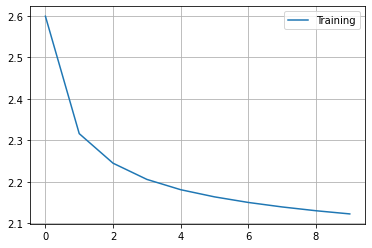

In [44]:
#training time
log = model.fit(X, y, epochs=10, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [47]:

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, sentence_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed()
print("seed = " + seed_pattern)

X = np.zeros((1, sentence_length, num_chars), dtype=np.float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(100):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=np.bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print("\nGenerated Names:\n", generated_text)

seed = CarePackag

Generated Names:
 ing Systems
Cherspank
Lipel
Preceryro
BP Systems
Plorertn.V.
Workson
Elada Inc.
Upit Valia
UnivebQ C


## Summary

Interesting 5 names that were produced at some testruns are: 
- Elada Inc.
- BP Systems
- Workson
- Preceryro
- Cherspank

Using Simple RNN, it is very interesting to see the model can produce a name with "Inc.", which is known as a specific company acronym. It is also surprising that generated names starts most of the time with capital letter.